In [4]:
import pandas as pd
import numpy as np

In [5]:
data1 = pd.read_csv("Train.csv")
data2 = pd.read_csv("Test.csv")

data = pd.concat([data1, data2], ignore_index = True)

data.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0


In [6]:
from sklearn.cluster import KMeans

data['x'] = np.cos(data['LAT']) * np.cos(data['LON'])
data['y'] = np.cos(data['LAT']) * np.sin(data['LON'])
data['z'] = np.sin(data['LAT'])


X = data[['x', 'y', 'z']].values
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

In [7]:
data.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2,x,y,z,Cluster
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0,-0.038209,0.029827,0.998825,1
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0,0.135476,-0.120157,0.983468,1
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0,0.425034,-0.235243,0.874075,0
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0,0.229719,-0.368315,0.900874,0
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0,0.351044,-0.344658,0.870620,0


# Cluster 1
data = data[data['Cluster'] == 0].reset_index(drop=True)

In [8]:
data = data[data['Cluster'] == 0].reset_index(drop=True)

In [10]:
data.shape

(12056, 18)

In [11]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)

/tmp/ipykernel_1374/3916194540.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)


In [12]:
data.set_index('Date', inplace=True)

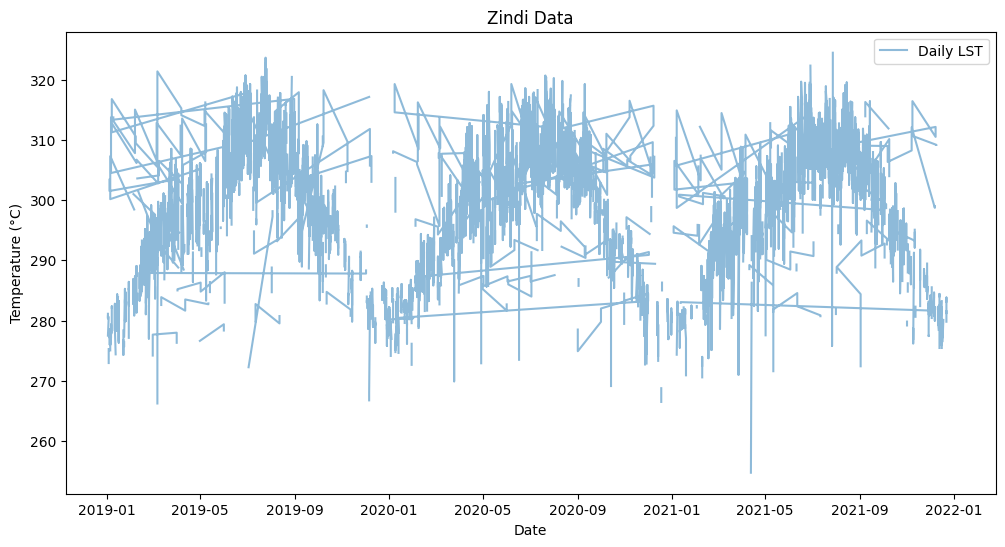

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['LST'], label='Daily LST', alpha=0.5)
plt.title("Zindi Data")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

In [14]:
data.isna().sum()

ID_Zindi                 0
ID                       0
LAT                      0
LON                      0
Precipitation            0
LST                   5243
AAI                   1430
CloudFraction         1430
NO2_strat             1430
NO2_total             1430
NO2_trop              4544
TropopausePressure    1430
GT_NO2                2420
x                        0
y                        0
z                        0
Cluster                  0
dtype: int64

In [15]:
data['LST_smoothed'] = data['LST'].rolling(window=30).mean()

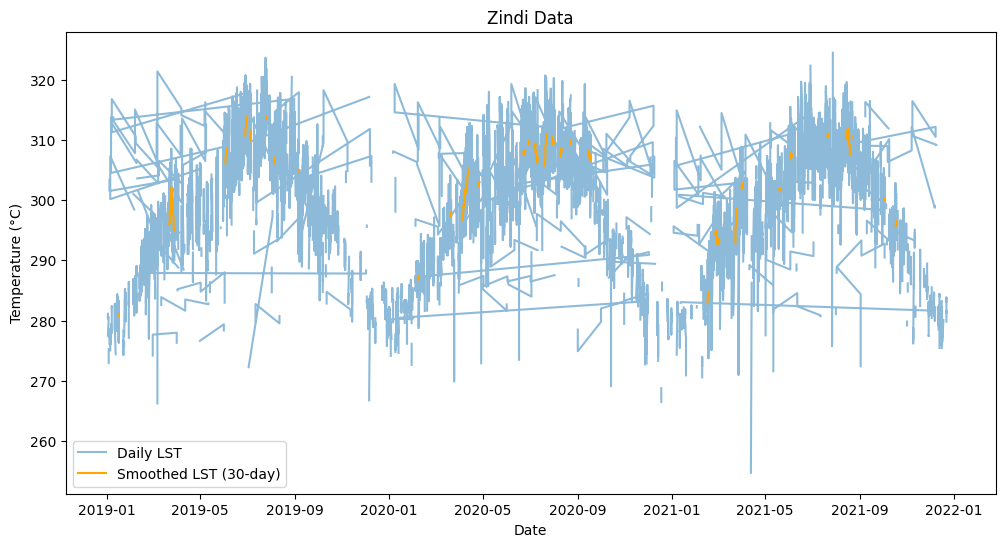

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['LST'], label='Daily LST', alpha=0.5)
plt.plot(data.index, data['LST_smoothed'], label='Smoothed LST (30-day)', color='orange')
plt.title("Zindi Data")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

In [26]:
data_2019 = data[data.index.year == 2019]
data_2020 = data[data.index.year == 2020]
data_2021 = data[data.index.year == 2021]

In [27]:
data_2019

,ID_Zindi,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2,x,y,z,Cluster,LST_smoothed
Date,,,,,,,,,,,,,,,,,,
2019-01-01,ID_V3136Z,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0,0.425034,-0.235243,0.874075,0,NaN
2019-01-01,ID_KRVZDJ,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0,0.229719,-0.368315,0.900874,0,NaN
2019-01-01,ID_PR351A,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0,0.351044,-0.344658,0.870620,0,NaN
2019-01-01,ID_S7G6X1,VR02,45.182626,11.310511,6.699392,NaN,0.051284,0.884321,0.000024,0.000146,NaN,14442.95417,NaN,0.112148,-0.344244,0.932158,0,NaN
2019-01-01,ID_BUM3G3,X10097,45.046502,11.180936,2.929149,NaN,-0.002400,0.881816,0.000024,0.000268,NaN,14440.19880,22.4,0.089423,-0.476888,0.874403,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29,ID_DPVZOG,X6877,45.151743,10.781408,0.000000,278.62,-0.663309,0.524250,0.000028,0.000113,NaN,14445.61090,NaN,-0.083029,-0.381736,0.920534,0,NaN
2019-12-30,ID_6ZGX68,PD03,45.289376,11.642394,0.000000,277.46,-0.601527,0.215685,0.000028,0.000132,0.000105,13066.29509,NaN,0.157094,-0.208017,0.965428,0,NaN
2019-12-30,ID_HO5MS5,X6877,45.151743,10.781408,0.000000,278.48,-0.845106,0.165982,0.000028,0.000113,0.000086,13066.85806,NaN,-0.083029,-0.381736,0.920534,0,NaN


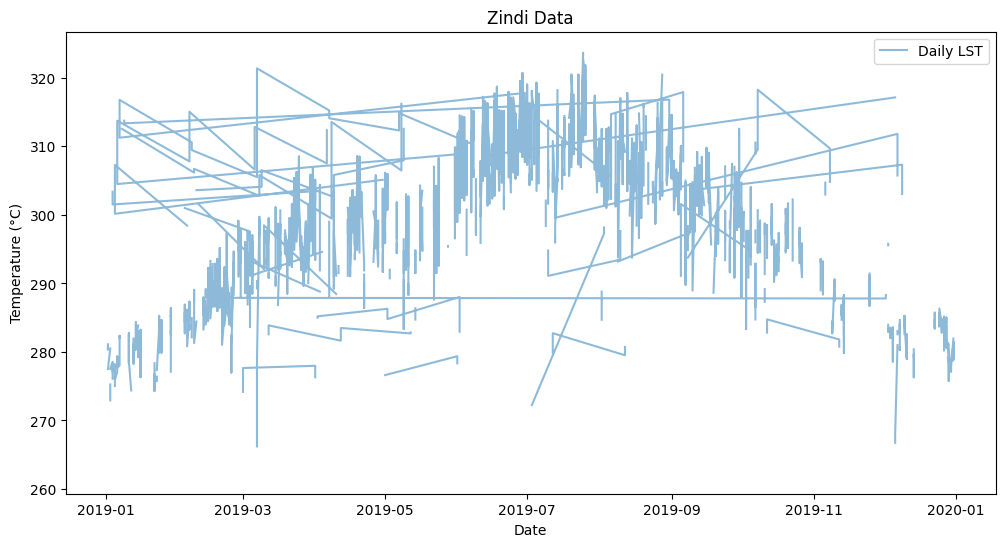

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(data_2019.index, data_2019['LST'], label='Daily LST', alpha=0.5)
plt.title("Zindi Data")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

In [29]:
data_2019['LST'].isna().sum()

1823

In [30]:
data_2019 = data_2019.sort_index()

In [31]:
data_2019['LST'] = data_2019['LST'].interpolate(method='time')

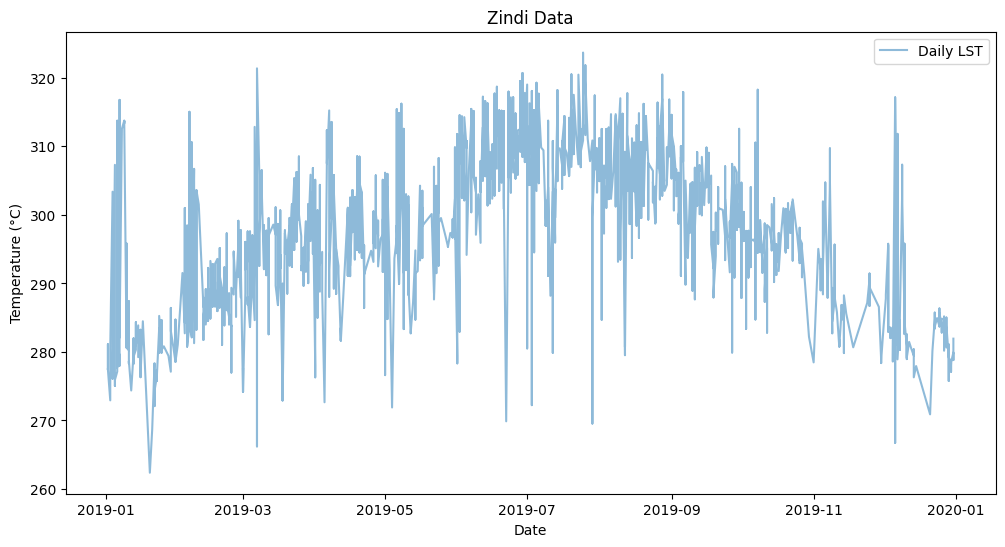

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(data_2019.index, data_2019['LST'], label='Daily LST', alpha=0.5)
plt.title("Zindi Data")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()